Processing: ETH-USD...
Processing: BTC-USD...
Processing: NVDA...
Processing: GOOG...

=== DCA Total Return Comparison ===
         Total Invested ($)  Final Value ($)  Total Return (%)
ETH-USD              8900.0         33973.80            281.73
BTC-USD              9900.0         97019.30            879.99
NVDA                 9900.0        125318.77           1165.85
GOOG                 9900.0         19427.01             96.23


C:\Users\Leon\AppData\Local\Temp\ipykernel_6968\2167790657.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_price = float(prices[-1])
C:\Users\Leon\AppData\Local\Temp\ipykernel_6968\2167790657.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_price = float(prices[-1])
C:\Users\Leon\AppData\Local\Temp\ipykernel_6968\2167790657.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_price = float(prices[-1])
C:\Users\Leon\AppData\Local\Temp\ipyk

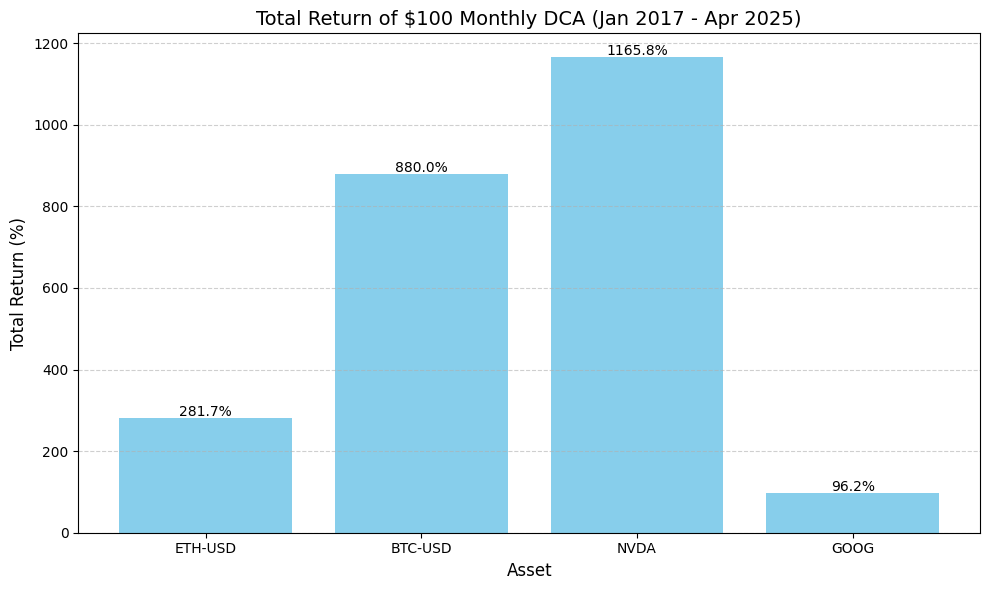

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
start_date = "2017-01-01"
end_date = "2025-04-01"
monthly_investment = 100
assets = ["ETH-USD", "BTC-USD", "NVDA", "GOOG"]
results = {}

for symbol in assets:
    print(f"Processing: {symbol}...")
    try:
        data = yf.download(symbol, start=start_date, end=end_date, interval="1mo", progress=False)

        if "Adj Close" in data.columns:
            price_data = data["Adj Close"].dropna().astype(float)
        elif "Close" in data.columns:
            price_data = data["Close"].dropna().astype(float)
        else:
            print(f"{symbol} has no usable price data, skipping...")
            continue

        prices = price_data.values

        if len(prices) == 0:
            print(f"{symbol} has no price data after filtering, skipping...")
            continue

        units = monthly_investment / prices
        total_units = np.sum(units)
        total_invested = len(prices) * monthly_investment
        final_price = float(prices[-1])
        final_value = total_units * final_price
        total_return = (final_value - total_invested) / total_invested * 100

        results[symbol] = {
            "Total Invested ($)": round(float(total_invested), 2),
            "Final Value ($)": round(float(final_value), 2),
            "Total Return (%)": round(float(total_return), 2)
        }
    except Exception as e:
        print(f"Error while processing {symbol}: {e}")

# Display result
df_result = pd.DataFrame(results).T
print("\n=== DCA Total Return Comparison ===")
print(df_result)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df_result.index, df_result["Total Return (%)"], color="skyblue")
plt.title("Total Return of $100 Monthly DCA (Jan 2017 - Apr 2025)", fontsize=14)
plt.xlabel("Asset", fontsize=12)
plt.ylabel("Total Return (%)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f"{height:.1f}%", ha="center", fontsize=10)

plt.tight_layout()
plt.show()
